### Interacting with the scene window

We can use the GUI interactively to select regions of interest (ROI) in the scene window. We can also extract data from an ROI by script and plot the scene energy, photons, or reflectance from the ROI.  Although the interactive windows do not run on ISETBIO-HUB, we can still give you a sense of  selecting regions and plotting through this notebook.

In most cases the data we plot are stored in the plot window within a variable, 'userdata' that is attached to the figure.

** Key functions** scenePlot, ieRoc2Locs, vcGetROIData

** See more plotting examples at the bottom of this notebook **

Additional examples of working with scenes [can be found here](http://imageval.com/wiki/doku.php?id=scenes_scripts).  Most (but maybe not all) of the examples there also work with ISETBIO.

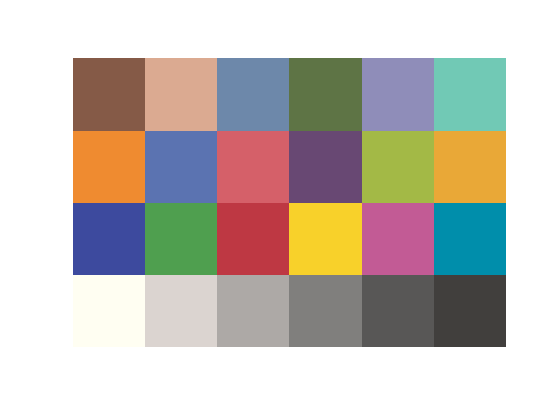

In [10]:
% Get ready and show a picture
ieInit;
scene = sceneCreate('macbethd65');
sceneShowImage(scene);

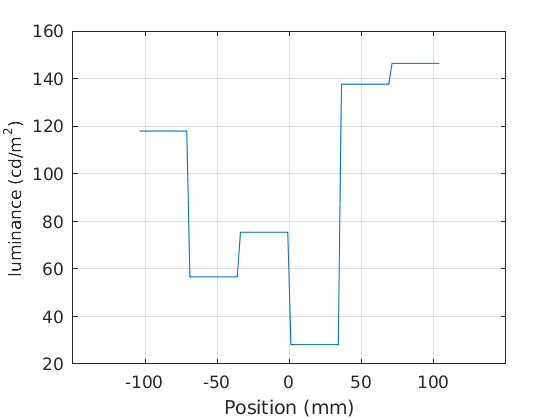

ans = 

        pos: [1x96 double]
       data: [96x1 double]
        cmd: 'plot(pos,lum)'
    roiLocs: [1 32]


In [13]:
% Here are the luminance data from a row in the middle of the image
rows = round(sceneGet(scene,'rows')/2);
[uData, h] = scenePlot(scene,'luminance hline',[1,rows]);
set(gca,'fontsize',8)

% The uData structure is also attached to the figure in the userdata slot
get(h,'userdata')

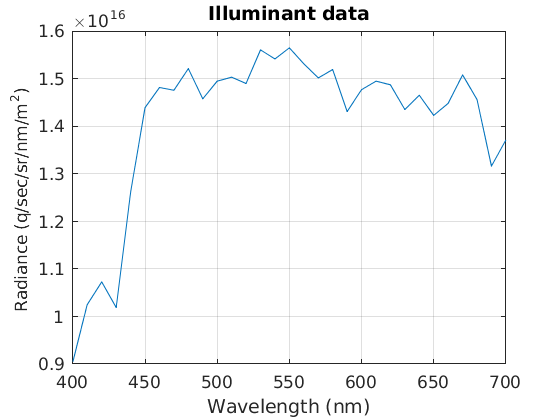

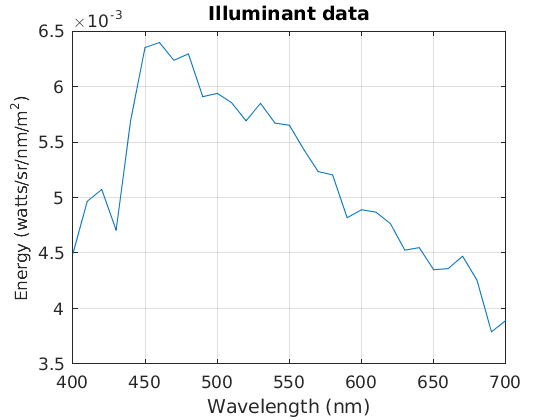

In [15]:
% The scenePlot function retrieves many types of information from the scene structure

% Here we retrieve the SPD of the illuminant in energy units
scenePlot(scene,'illuminant energy');
set(gca,'fontsize',8)

% And in photons
scenePlot(scene,'illuminant photons');
set(gca,'fontsize',8)

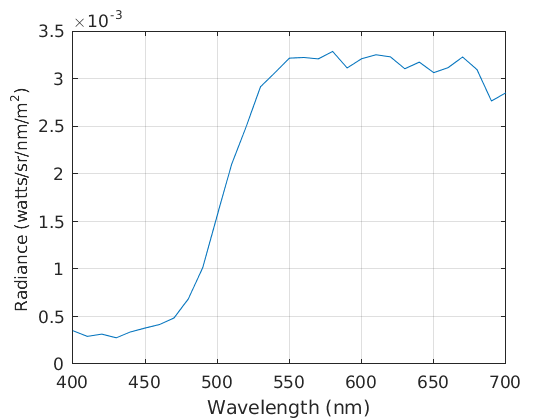

In [18]:
% You can plot the data in a region of interest (ROI)

rect = [51    35    10    11];   % Yellow Macbeth patch
scenePlot(scene,'radiance energy roi',rect);
set(gca,'fontsize',8)

### Plotting scene data

The gateway routine to plot scene properties is **scenePlot**.  Here are some examples of plots.
 
###  Radiance

      {'radiance hline'}          - Horizontal line radiance (photons)
      {'radiance vline'}          - Vertical line radiance (photons)
      {'radiance hline image'}    - Horizontal line radiance as a spectrogram image (photons)
      {'radiance vline image'}    - Vertical line radiance as a spectogram image (photons)
 
      {'radiance fft'}             - Contrast spatial frequency amplitude(single wavelength)
      {'radiance energy roi'}      - mean energy radiance of roi
      {'radiance photons roi'}     - mean quantal radiance of roi
      {'radiance image grid'}      - Render radiance image
      {'radiance waveband image'}  - Render waveband range of radiance image
 
### Reflectance

      {'reflectance roi'}          - mean reflectance of roi
 
###  Luminance and chromaticity

      {'luminance roi'}           - mean luminance of roi
      {'luminance hline'}         - Horizontal line luminance
      {'luminance vline '}        - Vertical line luminance
      {'luminance fft'}           - 2D fft of scene luminance contrast
      {'luminance fft hline'}     - Horizontal line luminance contrast Fourier transform
      {'luminance fft vline'}     - Vertical line luminance Fourier transform
      {'luminance mesh linear'}
      {'luminance mesh log10'}
      {'chromaticity'}            - mean CIE-roiLocs chromaticity of roi
 
### Contrast

      {'contrast hline'}          - Horizontal line contrast
      {'contrast vline'}          - Vertical line contrast
 
### Illuminant

      {'illuminant energy'}       - Pure spectral case illuminant energy
      {'illuminant energy roi'}   - Spatial-spectral illuminant energy
      {'illuminant photons'}      - Pure spectral case illuminant energy
      {'illuminant photons roi'}  - Spatial-spectral scene illuminant photons
      {'illuminant image'}        - RGB image of space-varying illumination
      {'illuminant hline energy'}
      {'illuminant hline photons'}
      {'illuminant vline energy'}
      {'illuminant vline photons'}
      
### Depth

      {'depth map'}              - Depth map (Meters)
      {'depth map contour'}      - Depth map with contour overlaid (Meters) 
 
###  Examples:

* A line plot of the spectral radiance, starting at the (x,y) point [1,rows]

```
    scene = sceneCreate;
    rows = round(sceneGet(scene,'rows')/2);
    scenePlot(scene,'hline radiance',[1,rows]);
```

* Fourier Transform of the luminance in the row - ```uData = scenePlot(scene,'luminance fft hline',[1,rows])```
* Radiance image with an overlaid spatial grid - ```scenePlot(scene,'radiance image with grid')```
* Illuminant  -   ```scenePlot(scene,'illuminant photons')```
* Depth map   -   ```scenePlot(scene,'depth map')```
* Reflectance data from an ROI
```
    scene = sceneCreate;
    rect = [32 32 16 16];
    [f, uData] = scenePlot(scene,'reflectance',rect);
```